# libraries and import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Functions

In [2]:
#function to calculate the summary
def group_plot(df,var1,var2):
    df1=df.groupby(var1)[var2].count()
    df1=df1.reset_index()
    df1.rename(columns={var2:'Total Count'}, inplace=True)
    df1.sort_values(by=['Total Count'], ascending=False, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    return df1

# Creation of initial data frame (Parameters)

In [3]:
df=pd.read_csv("C:/Users/crist/Desktop/pyton cosas/pyton proj/data_cleaned_2021.csv")

In [4]:
df.drop('index', axis=1,inplace=True)

In [5]:
#as you can see we have a rating data that is -1 therefore this has to be changed
#in order not to affect the data frame, it is exchanged for the average of the ratings
avg=df.loc[df['Rating'] != -1, 'Rating'].mean()
df['Rating']= np.where(df['Rating'] == -1, avg, df['Rating'])

In [6]:
avg=np.ceil(df.loc[df['Founded'] != -1, 'Founded'].mean())
df['Founded']=np.where(df['Founded'] == -1 , avg, df['Founded'])

In [7]:
#cambiar los valores negativos que dab como -1
avg=np.ceil(df.loc[df['Age'] != -1, 'Age'].mean())
df['Age']=np.where(df['Age'] == -1 , avg, df['Age'])

## Creation of the final data frame

In [8]:
conditions=[df['Rating'] <= 2,
            df['Rating'] <= 2.5,
            df['Rating'] <= 3,
            df['Rating'] <= 3.5,
            df['Rating'] <= 4,
            df['Rating'] <= 4.5]
           
choices=[2,2.5,3,3.5,4,4.5] 
df.loc[:,'Grouped_Rating']= np.select(conditions,choices,default=5)

In [9]:
new_df=df[['job_title_sim', 'Job Location', 'Grouped_Rating', 'Avg Salary(K)', 'Sector', 'Type of ownership', 'Revenue', 'Python', 'excel', 'sql', 'aws']]


In [10]:
new_df.rename(columns={'Avg Salary(K)': 'Avg_Salary'}, inplace=True)

C:\Users\crist\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
states_jobs=group_plot(df,'Job Location','Job Title') 
states_job_top= states_jobs[0:10]
print(states_job_top)

  Job Location  Total Count
0           CA          152
1           MA          103
2           NY           72
3           VA           41
4           IL           40
5           MD           35
6           PA           33
7           TX           28
8           WA           21
9           NC           21


In [12]:
df['Sector'].nunique()
sector_job=group_plot(df,'Sector','Job Title') 
sector_job_top=sector_job[0:10]


In [13]:
top_locations=states_job_top['Job Location'][0:5].tolist()
conditions=[new_df['Job Location'] == top_locations[0],
            new_df['Job Location'] == top_locations[1],
            new_df['Job Location'] == top_locations[2],
            new_df['Job Location'] == top_locations[3],
            new_df['Job Location'] == top_locations[4]]

In [14]:
conditions=[new_df['job_title_sim'] == "data scientist",
            new_df['job_title_sim'] == "machine learning engineer",
            new_df['job_title_sim'] == "data engineer"]

choices=["data scientist","machine learning engineer","data engineer"]

new_df.loc[:,'group_title']=np.select(conditions,choices,default='Rest')

top_sector=sector_job_top['Sector'][0:5].tolist()
conditions=[new_df['Sector'] == top_sector[0],
            new_df['Sector'] == top_sector[1],
            new_df['Sector'] == top_sector[2],
            new_df['Sector'] == top_sector[3],
            new_df['Sector'] == top_sector[4]]

choices=[top_sector[0],top_sector[1],top_sector[2],top_sector[3],top_sector[4]]

new_df.loc[:,'group_sector']=np.select(conditions,choices,default='Rest')

C:\Users\crist\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [15]:
new_df.loc[:,'group_loc']=np.select(conditions,choices,default='Rest')

In [16]:
print(choices)

['Information Technology', 'Biotech & Pharmaceuticals', 'Business Services', 'Insurance', 'Health Care']


In [17]:
final_new_df=new_df[['Grouped_Rating', 'Avg_Salary', 'Python', 'excel', 'sql', 'group_title', 'group_sector', 'aws']]
final_new_df=pd.get_dummies(final_new_df, columns=['Grouped_Rating','group_title', 'group_sector'])

# Start Models Machine learning

In [18]:
#define the predictor and the response variables
list_cols=final_new_df.columns.tolist()
list_cols=list_cols[1:]
x=final_new_df[list_cols]
y=final_new_df[['Avg_Salary']]

In [19]:
corr_df = final_new_df.corr()

In [20]:
corr_df = final_new_df.corr(method='pearson')
corr_df



,Avg_Salary,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
Avg_Salary,1.000000,0.315552,-0.072323,0.002008,0.172660,-0.023788,-0.076525,-0.111666,-0.021609,0.065040,...,-0.463405,0.045725,0.383320,0.116422,0.119725,-0.039171,-0.173380,0.176882,0.038104,-0.157964
Python,0.315552,1.000000,-0.021519,0.373999,0.203221,0.017660,-0.114226,-0.092865,-0.008840,0.029458,...,-0.527128,0.103972,0.408043,0.101506,-0.159648,0.094140,-0.172702,0.169460,0.023678,-0.024090
excel,-0.072323,-0.021519,1.000000,0.109548,-0.019235,0.018338,-0.007233,0.032190,-0.014780,-0.028338,...,0.118497,-0.060489,-0.047376,-0.071649,0.048494,0.042243,-0.148007,-0.070023,0.045703,0.047074
sql,0.002008,0.373999,0.109548,1.000000,0.106902,0.019698,-0.056400,-0.073122,0.004132,-0.027676,...,-0.240633,0.191451,0.085734,0.027550,-0.296426,0.178547,-0.087877,0.105778,0.080426,-0.002031
aws,0.172660,0.203221,-0.019235,0.106902,1.000000,0.014400,-0.087926,-0.133197,0.025018,-0.003573,...,-0.236088,0.265705,0.030522,0.014601,-0.040411,0.178502,-0.007944,0.098341,-0.047637,-0.154887
Grouped_Rating_2.0,-0.023788,0.017660,0.018338,0.019698,0.014400,1.000000,-0.010046,-0.020238,-0.037645,-0.050891,...,0.079996,-0.027846,-0.054423,-0.011137,0.032461,-0.024708,-0.016942,-0.036058,-0.020401,0.047931
Grouped_Rating_2.5,-0.076525,-0.114226,-0.007233,-0.056400,-0.087926,-0.010046,1.000000,-0.050083,-0.093161,-0.125941,...,0.126069,-0.068912,-0.063731,-0.027562,0.178209,0.016810,-0.041927,-0.089235,-0.050488,-0.013197
Grouped_Rating_3.0,-0.111666,-0.092865,0.032190,-0.073122,-0.133197,-0.020238,-0.050083,1.000000,-0.187670,-0.253702,...,0.140004,-0.036987,-0.176727,0.192325,0.166176,-0.053895,-0.028035,-0.081685,-0.037370,0.024737
Grouped_Rating_3.5,-0.021609,-0.008840,-0.014780,0.004132,0.025018,-0.037645,-0.093161,-0.187670,1.000000,-0.471921,...,-0.028561,0.035284,0.024975,-0.066995,-0.145969,0.017347,0.152667,-0.097469,0.096906,0.047571
Grouped_Rating_4.0,0.065040,0.029458,-0.028338,-0.027676,-0.003573,-0.050891,-0.125941,-0.253702,-0.471921,1.000000,...,-0.040677,-0.032755,0.067662,-0.009267,0.080115,-0.170370,0.010184,-0.020038,0.096357,0.014677


In [21]:
avg_corr=corr_df[:1]
avg_corr

,Avg_Salary,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
Avg_Salary,1.0,0.315552,-0.072323,0.002008,0.17266,-0.023788,-0.076525,-0.111666,-0.021609,0.06504,...,-0.463405,0.045725,0.38332,0.116422,0.119725,-0.039171,-0.17338,0.176882,0.038104,-0.157964


In [22]:
X = final_new_df.drop(columns='Avg_Salary')
y = final_new_df['Avg_Salary']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


## linear regression without normalizing

In [23]:
model=LinearRegression()

In [24]:
model = LinearRegression().fit(X_train, y_train)

In [25]:
print(f"intercept: {model.intercept_}")

intercept: [-4.896392e+15]


In [26]:
print(f"slope: {model.coef_}")

slope: [[ 1.07035406e+01 -2.70646277e+00 -6.96331830e+00  3.40563250e+00
   4.53382721e+15  4.53382721e+15  4.53382721e+15  4.53382721e+15
   4.53382721e+15  4.53382721e+15  4.53382721e+15  8.90913660e+14
   8.90913660e+14  8.90913660e+14  8.90913660e+14 -5.28348869e+14
  -5.28348869e+14 -5.28348869e+14 -5.28348869e+14 -5.28348869e+14
  -5.28348869e+14]]


In [27]:
print("Intercept:", model.intercept_)
print("Coeficiente:", list(zip(X.columns, model.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", model.score(X_train, y_train))

Intercept: [-4.896392e+15]
Coeficiente: [('Python', 10.703540622676245), ('excel', -2.706462770451287), ('sql', -6.963318300804094), ('aws', 3.4056324965936215), ('Grouped_Rating_2.0', 4533827205188810.0), ('Grouped_Rating_2.5', 4533827205188779.0), ('Grouped_Rating_3.0', 4533827205188803.0), ('Grouped_Rating_3.5', 4533827205188804.0), ('Grouped_Rating_4.0', 4533827205188801.0), ('Grouped_Rating_4.5', 4533827205188805.0), ('Grouped_Rating_5.0', 4533827205188804.0), ('group_title_Rest', 890913660315916.9), ('group_title_data engineer', 890913660315935.5), ('group_title_data scientist', 890913660315947.9), ('group_title_machine learning engineer', 890913660315965.6), ('group_sector_Biotech & Pharmaceuticals', -528348869331429.9), ('group_sector_Business Services', -528348869331450.6), ('group_sector_Health Care', -528348869331457.94), ('group_sector_Information Technology', -528348869331441.3), ('group_sector_Insurance', -528348869331434.94), ('group_sector_Rest', -528348869331454.44)]
C

In [28]:
# Model test error
# ==============================================================================
predicciones = model.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 29.91394608545632


In [29]:
X_test







,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,Grouped_Rating_4.5,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
647,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
96,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
352,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
582,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
533,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
667,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
65,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
705,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


## model ridge

In [30]:
# Creation and training of the model (with search by CV of the optimal alpha value)
# ==================================================== ==============================
# By default RidgeCV uses the mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

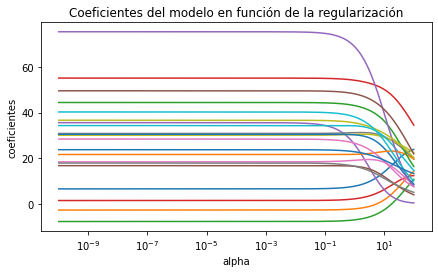

In [31]:
# Evolution of the coefficients as a function of alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [32]:
# Evolution of the error as a function of alpha
# ==================================================== ==============================
# model.cv_values stores the mse of cv for each value of alpha. Have
# dimensions (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Apply the square root to go from mse to rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Identifies the optimum and the optimum + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


In [33]:
print(f"Best alpha value found: {modelo.alpha_}")


Best alpha value found: 0.1683180353330955


In [34]:
# ==============================================================================
modelo = Ridge(alpha=modelo.alpha_, normalize=True)
modelo.fit(X_train, y_train)

Ridge(alpha=0.1683180353330955, normalize=True)

In [35]:
# Model test error
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"The error (rmse) of the test is: {rmse_ridge}")

[[ 97.08827924]
 [105.78341664]
 [123.59117979]]

The error (rmse) of the test is: 29.680497392986396


In [36]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X_train, y_train))

Intercept: [102.27281081]
Coeficiente: [('Python', 6.6728966598606405), ('excel', -2.7336464261420326), ('sql', -6.190620050531834), ('aws', 1.8840984511749683), ('Grouped_Rating_2.0', 3.552204668893482), ('Grouped_Rating_2.5', -10.369084859854523), ('Grouped_Rating_3.0', -9.271800844334111), ('Grouped_Rating_3.5', 1.0114597812210022), ('Grouped_Rating_4.0', 0.7798054360633547), ('Grouped_Rating_4.5', 4.051862238568912), ('Grouped_Rating_5.0', 0.738072660510085), ('group_title_Rest', -17.406921244131844), ('group_title_data engineer', 2.6498717858811123), ('group_title_data scientist', 12.798118023760273), ('group_title_machine learning engineer', 28.48821342248501), ('group_sector_Biotech & Pharmaceuticals', 14.176230667181821), ('group_sector_Business Services', -3.799650524588049), ('group_sector_Health Care', -13.436933539519057), ('group_sector_Information Technology', 3.986112106477386), ('group_sector_Insurance', 6.572578892906394), ('group_sector_Rest', -8.047602153392605)]
Coe

## Lasso

In [37]:
# Creation and training of the model (with search by CV of the optimal alpha value)
# ==================================================== ==============================
# By default LassoCV uses the mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

C:\Users\crist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.2116582173039, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 820.2695486293524, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 927.1353234831477, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conver

C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49794.754756127484, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49785.82341421326, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49778.12301882281, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conve

C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.87784816383, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.80418599583, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.7409740304, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converg

C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.35886397853, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.36387849023, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.35386770265, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conver

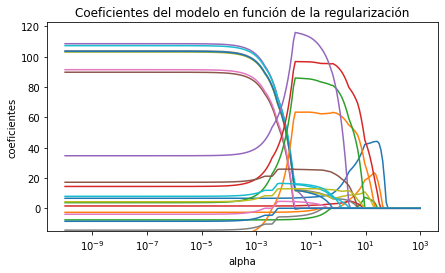

In [38]:
# Evolution of the coefficients as a function of alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.2116582173039, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 820.2695486293524, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 927.1353234831477, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conver

C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49771.48591096577, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49765.76674205699, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49760.83964671072, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conver

C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.63951039658, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.59918522212, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.564465246105, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conve

C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.36177059403, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.35692030884, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49730.34677570581, tolerance: 605.9483
  model = cd_fast.enet_coordinate_descent(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conver

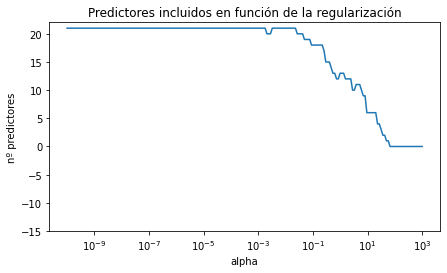

In [39]:
# Number of included predictors (coefficient !=0) as a function of alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

In [40]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.019791668678535573


In [41]:

# ==============================================================================
modelo = Lasso(alpha=modelo.alpha_, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=0.019791668678535573, normalize=True)

In [42]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [111.39125453]
Coeficiente: [('Python', 5.875790421791333), ('excel', -1.9519891249297991), ('sql', -6.458037985559679), ('aws', 0.5775001231641625), ('Grouped_Rating_2.0', 0.0), ('Grouped_Rating_2.5', -10.605404672395101), ('Grouped_Rating_3.0', -10.29822888438004), ('Grouped_Rating_3.5', 0.0), ('Grouped_Rating_4.0', -0.0), ('Grouped_Rating_4.5', 2.6743044749531224), ('Grouped_Rating_5.0', -0.0), ('group_title_Rest', -23.506548915281577), ('group_title_data engineer', -0.0), ('group_title_data scientist', 9.510411520177849), ('group_title_machine learning engineer', 26.899358713976973), ('group_sector_Biotech & Pharmaceuticals', 11.919168259463518), ('group_sector_Business Services', -6.433555313027128), ('group_sector_Health Care', -16.592013636490954), ('group_sector_Information Technology', 0.0), ('group_sector_Insurance', 2.394040783632111), ('group_sector_Rest', -11.761470014632073)]
Coeficiente de determinación R^2: 0.3207944787954774


In [43]:
# Model test error
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse_lasso = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")

[ 97.85188474 106.60595934 122.99372296]

El error (rmse) de test es: 29.77013875570214


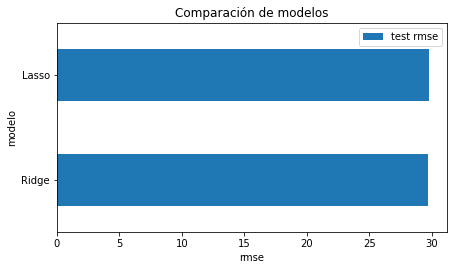

In [44]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso'],
                    'test rmse': [rmse_ridge, rmse_lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [45]:
jason={
  "question": [   
    "Q1. Python?",
    "Q2. excell?",
    "Q3. sql?",
    "Q4. aws?",
    "Q5. grouped rating?",
    "Q6. group_title?",
    "Q7.group_sector?",      
  ],
  "answer": [
    7,
    5,
    5,
    5,
    5,
    5,
    8,
  ],
  "options": [
       ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],
     ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],
     ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],
     ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],  

    ["hasta 2",
      "desde 2 a 2.5",
      "desde 2.5 a 3",
      "desde 3 a 3.5",
      "desde 3.5 a 4",
      "desde 4 a 4.5",
      "desde 4.5 a 5",
    ],  
    ["rest",
     "data engineer",
      "data scientist",
      "machine learning engineer",
      "-",
      "-",
      "-",
      ],
    [ "Biotech & Pharmaceuticals",
     "Business Services",
     "Health Care",
     "Information Technology",
     "Insurance",
     "rest",
      "-",
     
    ],
      
      
    
  ]
}

In [ ]:
# Python program to create a simple GUI
# Simple Quiz using Tkinter
 
#import everything from tkinter
from tkinter import *

# and import messagebox as mb from tkinter
from tkinter import messagebox as mb
Answers=[]
#import json to use json file for data 
#class to define the components of the GUI
class Quiz:
    
    # This is the first method which is called when a
    # new object of the class is initialized. This method
    # sets the question count to 0. and initialize all the
    # other methoods to display the content and make all the
    # functionalities available
    def __init__(self):
         
        # set question number to 0
        self.q_no=0
         
        # assigns ques to the display_question function to update later.
        self.display_title()
        self.display_question()
         
        # opt_selected holds an integer value which is used for
        # selected option in a question.
        self.opt_selected=IntVar()
         
        # displaying radio button for the current question and used to
        # display options for the current question
        self.opts=self.radio_buttons()
         
        # display options for the current question
        self.display_options()
         
        # displays the button for next and exit.
        self.buttons()
         
        # no of questions
        self.data_size=len(question)
         
        # keep a counter of correct answers
        self.correct=0
 
 
    # This method is used to display the result
    # It counts the number of correct and wrong answers
    # and then display them at the end as a message Box
    def display_result(self):
        
    
        
        respuesta=[]
        
        if Answers[0] == 1:
            respuesta.append(1)
        else :
            respuesta.append(0)

        if Answers[1] == 1:
            respuesta.append(1)
        else :
            respuesta.append(0)
    
        if Answers[2] == 1:
            
            respuesta.append(1)
        else :
                    respuesta.append(0)

        if Answers[3] == 1:
            respuesta.append(1)
        else :
            respuesta.append(0)



        if Answers[4]==1:
            respuesta.append(1)
        elif Answers[4] != 1:
            respuesta.append(0)
        if Answers[4] == 2:
            respuesta.append(1)
        elif Answers[4] != 2:
            respuesta.append(0)
        if Answers[4] == 3:
            respuesta.append(1)
        elif Answers[4] != 3:
            respuesta.append(0)
        if Answers[4] == 4:
            respuesta.append(1)
        elif Answers[4] != 4:
            respuesta.append(0)
    
        if Answers[4] == 5:
            respuesta.append(1)
        elif Answers[4] != 5:
            respuesta.append(0)
        if Answers[4] == 6:
            respuesta.append(1)
        elif Answers[4] != 6:
            respuesta.append(0)
        if Answers[4] == 7:
            respuesta.append(1)
        elif Answers[4] != 7:
            respuesta.append(0)

    
    
        if Answers[5]==1:        
            respuesta.append(1)
        elif Answers[5] != 1:
            respuesta.append(0)
        if Answers[5] == 2:
            respuesta.append(1)
        elif Answers[5] != 2:
            respuesta.append(0)
        if Answers[5] == 3:
            respuesta.append(1)
        elif Answers[5] != 3:
            respuesta.append(0)
        if Answers[5] == 4:
            respuesta.append(1)
        elif Answers[5] != 4:
            respuesta.append(0)
    
    
    
    
    
        if Answers[6]==1:
            respuesta.append(1)
    
        elif Answers[6] != 1:
            respuesta.append(0)

        if Answers[6] == 2:
            respuesta.append(1)
    
        elif Answers[6] != 2:
            respuesta.append(0)
    
        if Answers[6] == 3:
            respuesta.append(1)
        elif Answers[6] != 3:
            respuesta.append(0)
        if Answers[6] == 4:
            respuesta.append(1)
        elif Answers[6] != 4:
            respuesta.append(0)
    
        if Answers[6] == 5:
            respuesta.append(1)
        elif Answers[6] != 5:
            respuesta.append(0)   
    
        if Answers[6] == 6:
            respuesta.append(1)
        elif Answers[6] != 6:
            respuesta.append(0)
        respuesta=np. array(respuesta) 
        respuesta=respuesta.reshape(1, -1)
        predicciones = modelo.predict(respuesta)
        salary=f"Salary: {predicciones}"
    


        
        
         
        # Shows a message box to display the result
        mb.showinfo("Result", f"\n{salary}")
 
 
    # This method checks the Answer after we click on Next.
    def check_ans(self, q_no):
        Answers.append(self.opt_selected.get())
        # checks for if the selected option is correct
        if self.opt_selected.get() == answer[q_no]:
            # if the option is correct it return true
            return True
 
    # This method is used to check the answer of the
    # current question by calling the check_ans and question no.
    # if the question is correct it increases the count by 1
    # and then increase the question number by 1. If it is last
    # question then it calls display result to show the message box.
    # otherwise shows next question.
    def next_btn(self):
         
        # Check if the answer is correct
        if self.check_ans(self.q_no):
             
            # if the answer is correct it increments the correct by 1
            self.correct += 1
         
        # Moves to next Question by incrementing the q_no counter
        self.q_no += 1
         
        # checks if the q_no size is equal to the data size
        if self.q_no==self.data_size:
             
            # if it is correct then it displays the score
            self.display_result()
             
            # destroys the GUI
            gui.destroy()
        else:
            # shows the next question
            self.display_question()
            self.display_options()
 
 
    # This method shows the two buttons on the screen.
    # The first one is the next_button which moves to next question
    # It has properties like what text it shows the functionality,
    # size, color, and property of text displayed on button. Then it
    # mentions where to place the button on the screen. The second
    # button is the exit button which is used to close the GUI without
    # completing the quiz.
    def buttons(self):
         
        # The first button is the Next button to move to the
        # next Question
        next_button = Button(gui, text="Next",command=self.next_btn,
        width=10,bg="blue",fg="white",font=("ariel",16,"bold"))
         
        # palcing the button  on the screen
        next_button.place(x=350,y=380)
         
        # This is the second button which is used to Quit the GUI
        quit_button = Button(gui, text="Quit", command=gui.destroy,
        width=5,bg="black", fg="white",font=("ariel",16," bold"))
         
        # placing the Quit button on the screen
        quit_button.place(x=700,y=50)
 
 
    # This method deselect the radio button on the screen
    # Then it is used to display the options available for the current
    # question which we obtain through the question number and Updates
    # each of the options for the current question of the radio button.
    def display_options(self):
        val=0
         
        # deselecting the options
        self.opt_selected.set(0)
         
        # looping over the options to be displayed for the
        # text of the radio buttons.
        for option in options[self.q_no]:
            self.opts[val]['text']=option
            val+=1
 
 
    # This method shows the current Question on the screen
    def display_question(self):
         
        # setting the Question properties
        q_no = Label(gui, text=question[self.q_no], width=60,
        font=( 'ariel' ,16, 'bold' ), anchor= 'w' )
         
        #placing the option on the screen
        q_no.place(x=70, y=100)
 
 
    # This method is used to Display Title
    def display_title(self):
         
        # The title to be shown
        title = Label(gui, text="Salary prediction",
        width=50, bg="green",fg="white", font=("ariel", 20, "bold"))
         
        # place of the title
        title.place(x=0, y=2)
 
 
    # This method shows the radio buttons to select the Question
    # on the screen at the specified position. It also returns a
    # lsit of radio button which are later used to add the options to
    # them.
    def radio_buttons(self):
         
        # initialize the list with an empty list of options
        q_list = []
         
        # position of the first option
        y_pos = 150
         
        # adding the options to the list
        while len(q_list) < 7:
             
            # setting the radio button properties
            radio_btn = Radiobutton(gui,text=" ",variable=self.opt_selected,
            value = len(q_list)+1,font = ("ariel",14))
             
            # adding the button to the list
            q_list.append(radio_btn)
             
            # placing the button
            radio_btn.place(x = 100, y = y_pos)
             
            # incrementing the y-axis position by 40
            y_pos += 40
         
        # return the radio buttons
        return q_list
 
# Create a GUI Window
gui = Tk()
 
# set the size of the GUI Window
gui.geometry("800x450")
 
# set the title of the Window
gui.title("Salary prediction")
 
# get the data from the json file
data = jason
 
# set the question, options, and answer
question = (data['question'])
options = (data['options'])
answer = (data[ 'answer'])
 
# create an object of the Quiz Class.
quiz = Quiz()
 
# Start the GUI
gui.mainloop()
 
# END OF THE PROGRAM